# Replication

Here we'll repeat the calculations made in the reproduction section, but with a different data source, more leagues and more seasons. Our new data source is the FBref website. Our code may take some time to execute, so we're deliberately slowing down requests to the site to avoid getting banned.

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install scipy

In [ ]:
pip install lxml

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import shapiro
from scipy.stats import ks_2samp
from scipy.stats import wilcoxon, mannwhitneyu

## Home advantage

As in the previous experiment, playing at home gives a clear advantage over playing away. Whatever the league or year, the number of points won at home is always at least 50 more than away.

### COVID effect

If we take expected goals into account, all leagues have suffered a drop in home-game impact during the 2019-2020 and/or 2020-2021 seasons. However, if we take actual points into account, two groups seem to stand out. On the one hand, there's the **Championship**, **Serie-A** and **Ligue 2**, which have a clear drop in home advantage during the 2019-2020 and/or 2020-2021 seasons (depending on the restrictions in place). On the other, there's the **Primeira-Liga** and **Segunda-Division**, where we can't see a sufficiently significant difference.



In [4]:
SEASONS = [2019, 2020, 2021, 2022, 2023]
LEAGUES = {"Championship" : ["10", "101"], "Serie-A" : ["24", "241"], "Primeira-Liga" : ["32", "321"], "Segunda-Division" : ["17", "171"], "Ligue-2" : ["60", "601"]}
to_seasons = {2019 : "2019-2020", 2020 : "2020-2021", 2021 : "2021-2022", 2022 : "2022-2023", 2023 : "2023-2024"}

def getDiffPoints(dataframe):
  df_home = dataframe[0].loc[:, ['Home']].loc[:, ('Home', 'Pts')]
  df_away = dataframe[0].loc[:, ['Away']].loc[:, ('Away', 'Pts')]
  diff = df_home.sum() - df_away.sum()
  return diff

def getDiffXGoals(dataframe):
  df_home = dataframe[0].loc[:, ['Home']].loc[:, ('Home', 'xG')]
  df_away = dataframe[0].loc[:, ['Away']].loc[:, ('Away', 'xG')]
  diff = df_home.sum() - df_away.sum()
  return round(diff, 1)

final_df = pd.DataFrame(columns=["League", "Season", "Diff_pts", "Diff_xG"])
for league in LEAGUES.keys():
  for season in SEASONS:
    time.sleep(5)
    if(league == "Serie-A"):
      df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{season}/{season}-{league}-Stats', attrs={"id" :  f'results{season}{LEAGUES[league][1]}_home_away'})
    else :
      df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{to_seasons[season]}/{to_seasons[season]}-{league}-Stats', attrs={"id" :  f'results{to_seasons[season]}{LEAGUES[league][1]}_home_away'})
    diff_pts = getDiffPoints(df)
    diff_xG = getDiffXGoals(df)
    final_df = final_df._append({"League": league, "Season": season, "Diff_pts": diff_pts, "Diff_xG": diff_xG}, ignore_index=True)

final_df

C:\Users\jerome\AppData\Local\Temp\ipykernel_23248\985217677.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = final_df._append({"League": league, "Season": season, "Diff_pts": diff_pts, "Diff_xG": diff_xG}, ignore_index=True)


,League,Season,Diff_pts,Diff_xG
0,Championship,2019,171,128.4
1,Championship,2020,123,73.3
2,Championship,2021,237,125.0
3,Championship,2022,153,134.3
4,Championship,2023,207,135.3
5,Serie-A,2019,258,209.2
6,Serie-A,2020,210,99.9
7,Serie-A,2021,243,134.7
8,Serie-A,2022,192,151.7
9,Serie-A,2023,222,167.8


## More plots

Here we've replicated the bar charts that show the evolution of results between home and away over the seasons, as well as the expected goals.

Unlike the study, we don't notice any significant difference around the 2019-2020 and 2020-2021 seasons. In the Serie-A, the opposite is true, as expected goals at home in the 2019-2020 season are significantly higher than in other seasons.

C:\Users\jerome\AppData\Local\Temp\ipykernel_23248\2006868678.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = final_df._append({"Season": to_seasons[season], "result": getMeanPoints(df_pts_home), "xGoals" : getMeanPoints(df_xG_home), "result_away" : getMeanPoints(df_pts_away), "xGoalsAway": getMeanPoints(df_xG_away)}, ignore_index=True)


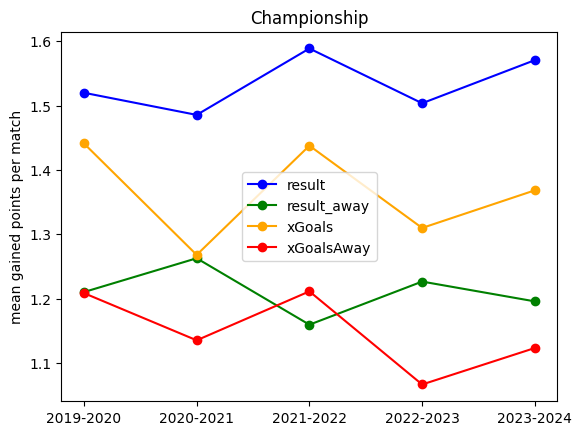

C:\Users\jerome\AppData\Local\Temp\ipykernel_23248\2006868678.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = final_df._append({"Season": to_seasons[season], "result": getMeanPoints(df_pts_home), "xGoals" : getMeanPoints(df_xG_home), "result_away" : getMeanPoints(df_pts_away), "xGoalsAway": getMeanPoints(df_xG_away)}, ignore_index=True)


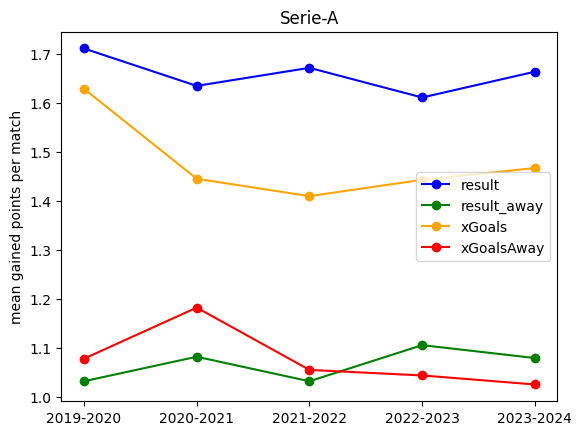

C:\Users\jerome\AppData\Local\Temp\ipykernel_23248\2006868678.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = final_df._append({"Season": to_seasons[season], "result": getMeanPoints(df_pts_home), "xGoals" : getMeanPoints(df_xG_home), "result_away" : getMeanPoints(df_pts_away), "xGoalsAway": getMeanPoints(df_xG_away)}, ignore_index=True)


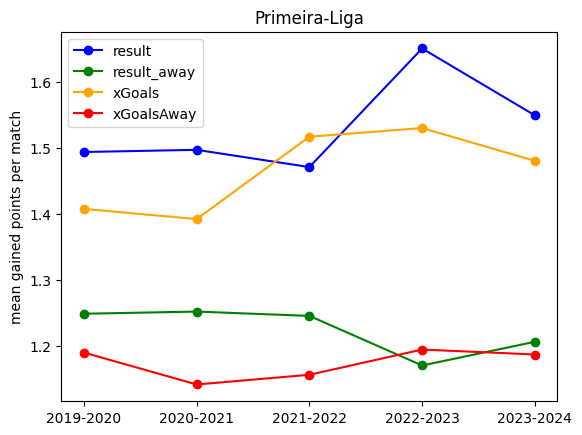

C:\Users\jerome\AppData\Local\Temp\ipykernel_23248\2006868678.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = final_df._append({"Season": to_seasons[season], "result": getMeanPoints(df_pts_home), "xGoals" : getMeanPoints(df_xG_home), "result_away" : getMeanPoints(df_pts_away), "xGoalsAway": getMeanPoints(df_xG_away)}, ignore_index=True)


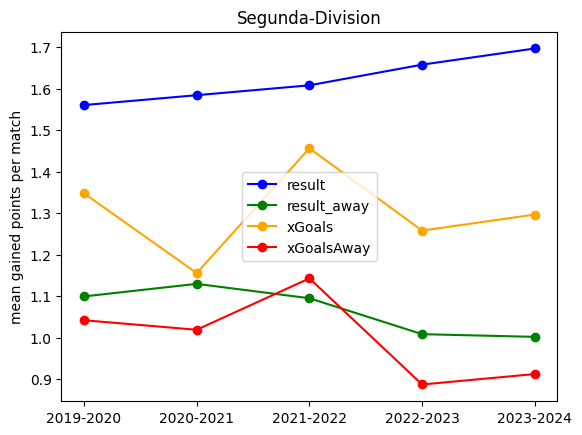

C:\Users\jerome\AppData\Local\Temp\ipykernel_23248\2006868678.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = final_df._append({"Season": to_seasons[season], "result": getMeanPoints(df_pts_home), "xGoals" : getMeanPoints(df_xG_home), "result_away" : getMeanPoints(df_pts_away), "xGoalsAway": getMeanPoints(df_xG_away)}, ignore_index=True)


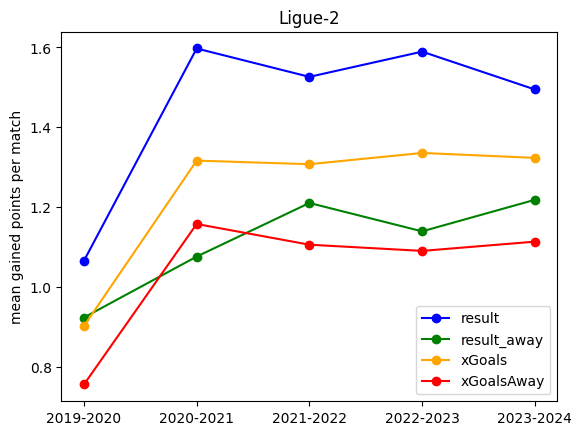

In [5]:
SEASONS = [2019, 2020, 2021, 2022, 2023]
LEAGUES = {"Championship" : ["10", "101"], "Serie-A" : ["24", "241"], "Primeira-Liga" : ["32", "321"], "Segunda-Division" : ["17", "171"], "Ligue-2" : ["60", "601"]}
to_seasons = {2019 : "2019-2020", 2020 : "2020-2021", 2021 : "2021-2022", 2022 : "2022-2023", 2023 : "2023-2024"}

def getMeanPoints(dataframe):
  sum = dataframe.sum()
  numTeams = len(dataframe)
  numMatches = numTeams * (numTeams - 1)
  mean = sum / numMatches
  return mean

for league in LEAGUES :
  final_df = pd.DataFrame(columns=["Season", "result", "xGoals", "result_away", "xGoalsAway"])
  for season in SEASONS :
    time.sleep(5)
    if(league == "Serie-A"):
      df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{season}/{season}-{league}-Stats', attrs={"id" :  f'results{season}{LEAGUES[league][1]}_home_away'})
    else :
      df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{to_seasons[season]}/{to_seasons[season]}-{league}-Stats', attrs={"id" :  f'results{to_seasons[season]}{LEAGUES[league][1]}_home_away'})
    df_pts_home = df[0].loc[:, ['Home']].loc[:, ('Home', 'Pts')]
    df_pts_away = df[0].loc[:, ['Away']].loc[:, ('Away', 'Pts')]
    df_xG_home = df[0].loc[:, ['Home']].loc[:, ('Home', 'xG')]
    df_xG_away = df[0].loc[:, ['Away']].loc[:, ('Away', 'xG')]
    final_df = final_df._append({"Season": to_seasons[season], "result": getMeanPoints(df_pts_home), "xGoals" : getMeanPoints(df_xG_home), "result_away" : getMeanPoints(df_pts_away), "xGoalsAway": getMeanPoints(df_xG_away)}, ignore_index=True)
  plt.plot(final_df['Season'], final_df['result'], marker='o', color="blue", label="result")
  plt.plot(final_df['Season'], final_df['result_away'], marker='o', color="green", label="result_away")
  plt.plot(final_df['Season'], final_df['xGoals'], marker='o', color="orange", label="xGoals")
  plt.plot(final_df['Season'], final_df['xGoalsAway'], marker='o', color="red", label="xGoalsAway")
  plt.title(league)
  plt.ylabel("mean gained points per match")
  plt.legend()
  plt.show()


## REALLY ?

In [6]:
def decomposeScore(score, home, away):
  goals = score.split(chr(8211))
  if goals[0] > goals[1]:
    home.append(3)
    away.append(0)
  elif goals[0] == goals[1]:
    away.append(1)
    home.append(1)
  else:
    away.append(3)
    home.append(0)
  return home, away

def decomposeXg(dataframe, home, away):
  home.append(dataframe[0])
  away.append(dataframe[1])

def calculate_effect_size(home, away, stat):
  n = len(home)
  z = stat
  return z / np.sqrt(n)

SEASONS = [2019, 2020, 2021, 2022, 2023]
LEAGUES = {"Championship" : ["10", "101"], "Serie-A" : ["24", "241"], "Primeira-Liga" : ["32", "321"], "Segunda-Division" : ["17", "171"], "Ligue-2" : ["60", "601"]}
to_seasons = {2019 : "2019-2020", 2020 : "2020-2021", 2021 : "2021-2022", 2022 : "2022-2023", 2023 : "2023-2024"}

final_df = pd.DataFrame(columns=["League", "Season", "Wilcoxon-result", "Wilcoxon-pvalue", "Effect-size", "Wilcoxon-xG", "Wilcoxon-xG-pvalue", "Effect_size_xG"])

for league in LEAGUES:
  for season in SEASONS:
    time.sleep(5)
    if(league == "Serie-A"):
      df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{season}/schedule/{season}-{league}-Scores-and-Fixtures', attrs={"id" :  f"sched_{season}_{LEAGUES[league][0]}_1"})
    else :
      df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{to_seasons[season]}/schedule/{to_seasons[season]}-{league}-Scores-and-Fixtures', attrs={"id" :  f"sched_{to_seasons[season]}_{LEAGUES[league][0]}_1"})
    df = df[0].drop(['Attendance', 'Notes'], axis=1).dropna()
    data_pts = df.loc[:, ['Score']]
    data_xG = df.loc[:, ['xG', 'xG.1']]
    home_pts = []
    away_pts = []
    home_xG = []
    away_xG = []
    for i in range(len(data_pts)):
      score = data_pts.iloc[i, 0]
      xG = data_xG.iloc[i, :]
      if type(score) == str:
        decomposeScore(score, home_pts, away_pts)
      decomposeXg(xG, home_xG, away_xG)
    wilco_test = wilcoxon(home_pts, away_pts)
    effect_size = calculate_effect_size(home_pts, away_pts, wilco_test.statistic)
    wilco_xG_test = wilcoxon(home_xG, away_xG)
    effect_size_xG = calculate_effect_size(home_xG, away_xG, wilco_xG_test.statistic)
    new_row = pd.DataFrame({
            "League": league,
            "Season": [season],
            "Wilcoxon-result": [wilco_test.statistic],
            "Wilcoxon-pvalue": [wilco_test.pvalue],
            "Effect-size" : [effect_size],
            "Wilcoxon-xG": [wilco_xG_test.statistic],
            "Wilcoxon-xG-pvalue": [wilco_xG_test.pvalue],
            "Effect_size_xG" : [effect_size_xG]
        })
    final_df = pd.concat([final_df, new_row], ignore_index=True)

final_df

C:\Users\jerome\AppData\Local\Temp\ipykernel_23248\1660045776.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  home.append(dataframe[0])
C:\Users\jerome\AppData\Local\Temp\ipykernel_23248\1660045776.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  away.append(dataframe[1])
C:\Users\jerome\AppData\Local\Temp\ipykernel_23248\1660045776.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before t

,League,Season,Wilcoxon-result,Wilcoxon-pvalue,Effect-size,Wilcoxon-xG,Wilcoxon-xG-pvalue,Effect_size_xG
0,Championship,2019,34946.0,4.520239e-03,1487.400536,53055.5,1.889085e-07,2258.192043
1,Championship,2020,38502.0,4.364564e-02,1638.753947,60754.0,5.265212e-03,2585.861963
2,Championship,2021,34569.0,1.013505e-04,1471.354351,56389.5,7.997368e-06,2400.096507
3,Championship,2022,35552.0,1.106970e-02,1513.193609,47869.0,9.738166e-09,2037.439944
4,Championship,2023,37524.0,7.939517e-04,1597.127503,52812.0,8.939138e-07,2247.827995
5,Serie-A,2019,13867.0,3.035564e-07,711.362090,16068.0,1.237318e-18,824.271008
6,Serie-A,2020,13786.5,2.192050e-05,707.232528,25154.0,2.295555e-05,1290.372973
7,Serie-A,2021,12462.0,7.154598e-07,639.287111,19513.5,5.821978e-12,1001.021429
8,Serie-A,2022,14196.0,1.042119e-04,728.239434,19752.0,1.484602e-12,1013.256221
9,Serie-A,2023,14664.0,1.331794e-05,753.239085,15801.5,4.831435e-17,811.668535


## Comparison between seasons

In [23]:
SEASONS = [2019, 2020, 2021, 2022, 2023]
LEAGUES = {"Championship": ["10", "101"], "Serie-A": ["24", "241"], "Primeira-Liga": ["32", "321"], "Segunda-Division": ["17", "171"], "Ligue-2": ["60", "601"]}
to_seasons = {2019: "2019-2020", 2020: "2020-2021", 2021: "2021-2022", 2022: "2022-2023", 2023: "2023-2024"}

def mannwhitneyutest(season1, season2):
    stat, p_value = mannwhitneyu(season1, season2, alternative="greater")
    return stat, p_value

def decomposeScoreHome(score, home):
    goals = score.split(chr(8211))
    if goals[0] > goals[1]:
        home.append(3)
    elif goals[0] == goals[1]:
        home.append(1)
    else:
        home.append(0)
    return home

tableaux = {}
for league in LEAGUES:
    tableaux[league] = pd.DataFrame(index=SEASONS, columns=SEASONS)

cpt = 0

for league in LEAGUES:
    season = 2019
    while season <= 2023:
        season1 = []
        time.sleep(20)
        if league == "Serie-A":
            df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{season}/schedule/{season}-{league}-Scores-and-Fixtures', attrs={"id": f"sched_{season}_{LEAGUES[league][0]}_1"})
        else:
            df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{to_seasons[season]}/schedule/{to_seasons[season]}-{league}-Scores-and-Fixtures', attrs={"id": f"sched_{to_seasons[season]}_{LEAGUES[league][0]}_1"})
        cpt += 1
        print(f"Request count: {cpt}")
        df = df[0].drop(['Attendance', 'Notes'], axis=1).dropna()
        data_pts = df.loc[:, ['Score']]
        for i in range(len(data_pts)):
            score = data_pts.iloc[i, 0]
            if type(score) == str:
                decomposeScoreHome(score, season1)
        other_season = season + 1
        while other_season <= 2023:
            season2 = []
            if league == "Serie-A":
                df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{other_season}/schedule/{other_season}-{league}-Scores-and-Fixtures', attrs={"id": f"sched_{other_season}_{LEAGUES[league][0]}_1"})
            else:
                df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{to_seasons[other_season]}/schedule/{to_seasons[other_season]}-{league}-Scores-and-Fixtures', attrs={"id": f"sched_{to_seasons[other_season]}_{LEAGUES[league][0]}_1"})
            cpt += 1
            print(f"Request count: {cpt}")
            df = df[0].drop(['Attendance', 'Notes'], axis=1).dropna()
            data_pts = df.loc[:, ['Score']]
            for i in range(len(data_pts)):
                score = data_pts.iloc[i, 0]
                if type(score) == str:
                    decomposeScoreHome(score, season2)
            _, p = mannwhitneyutest(season1, season2)
            tableaux[league].loc[other_season, season] = float(p)
            other_season += 1
        season += 1

Request count: 1
Request count: 2
Request count: 3
Request count: 4
Request count: 5
Request count: 6
Request count: 7
Request count: 8
Request count: 9
Request count: 10
Request count: 11
Request count: 12
Request count: 13
Request count: 14
Request count: 15
Request count: 16
Request count: 17
Request count: 18
Request count: 19
Request count: 20
Request count: 21
Request count: 22
Request count: 23
Request count: 24
Request count: 25
Request count: 26
Request count: 27
Request count: 28
Request count: 29
Request count: 30
Request count: 31
Request count: 32
Request count: 33
Request count: 34
Request count: 35
Request count: 36
Request count: 37
Request count: 38
Request count: 39
Request count: 40
Request count: 41
Request count: 42
Request count: 43
Request count: 44
Request count: 45
Request count: 46
Request count: 47
Request count: 48
Request count: 49
Request count: 50
Request count: 51
Request count: 52
Request count: 53
Request count: 54
Request count: 55
Request count: 56
R

In [24]:
from IPython.display import display
def color_red_if_below(value):
    if value == '':
      return 'color: white'
    color = 'red' if value < 0.05 else 'black'
    return f'color: {color}'

for league in LEAGUES:
  tableau = tableaux[league].fillna('')
  tableau_styled = tableau.style.applymap(color_red_if_below)
  print(f'{league} xPoints change significance with mann')
  display(tableau_styled)
  print('\n')

Championship xPoints change significance with mann


/tmp/ipykernel_19/963275791.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  tableau_styled = tableau.style.applymap(color_red_if_below)


,2019,2020,2021,2022,2023
2019,,,,,
2020,0.295822,,,,
2021,0.790443,0.907696,,,
2022,0.416142,0.628394,0.154631,,
2023,0.685407,0.841101,0.378236,0.754625,




Serie-A xPoints change significance with mann


,2019,2020,2021,2022,2023
2019,,,,,
2020,0.224327,,,,
2021,0.371457,0.672148,,,
2022,0.155744,0.397679,0.239614,,
2023,0.291851,0.578921,0.406758,0.674943,




Primeira-Liga xPoints change significance with mann


,2019,2020,2021,2022,2023
2019,,,,,
2020,0.502533,,,,
2021,0.453050,0.450813,,,
2022,0.887217,0.885036,0.910774,,
2023,0.685539,0.682571,0.728915,0.228212,




Segunda-Division xPoints change significance with mann


,2019,2020,2021,2022,2023
2019,,,,,
2020,0.548505,,,,
2021,0.662743,0.612388,,,
2022,0.884758,0.848510,0.771250,,
2023,0.940302,0.915891,0.864467,0.650170,




Ligue-2 xPoints change significance with mann


,2019,2020,2021,2022,2023
2019,,,,,
2020,0.950045,,,,
2021,0.752649,0.159351,,,
2022,0.915200,0.413529,0.771029,,
2023,0.682954,0.107902,0.410935,0.165986,
